In [1]:
# Import Dependencies
import pickle
import numpy as np
import torch
from torch import optim
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load Saved Data Train and Test
with open('./trainingData/trainingFeatures.pkl', 'rb') as file:
    X_train = pickle.load(file)

with open('./trainingData/trainingLabels.pkl', 'rb') as file:
    y_train = pickle.load(file)
            
with open('./testingData/testFeatures.pkl', 'rb') as file:
    X_test = pickle.load(file)
            
with open('./testingData/testingLabels.pkl', 'rb') as file:
    y_test = pickle.load(file)
    
print('Done loading data...')

Done loading data...


In [3]:
X_train.shape

(2467, 193)

In [4]:
y_train.shape

(2467, 10)

In [5]:
X_test.shape

(816, 193)

In [6]:
y_test.shape

(816, 10)

In [7]:
# Convert to Numpy to Torch Tensor
X_train = np.asarray(X_train)
X_train.shape

(2467, 193)

In [8]:
type(X_train)

numpy.ndarray

In [9]:
X_test = np.asarray(X_test)
type(X_test)

numpy.ndarray

In [10]:
y_train = np.asarray(y_train)
type(y_train)

numpy.ndarray

In [11]:
y_test = np.asarray(y_test)
type(y_test)

numpy.ndarray

In [12]:
# Convert to Torch Tensors
X_train = torch.from_numpy(X_train)
y_train = torch.from_numpy(y_train)

X_test = torch.from_numpy(X_test)
y_test = torch.from_numpy(y_test)

In [13]:
# Confirm types of training and test data
type(X_train)

torch.Tensor

In [14]:
# Confirm types of training and test data
type(y_train)

torch.Tensor

In [15]:
# Confirm types of training and test data
type(X_test)

torch.Tensor

In [16]:
# Confirm types of training and test data
type(y_test)

torch.Tensor

In [17]:
# Convert Torch Tensor Data Type to Float Tensor
X_train = X_train.type(torch.FloatTensor)
y_train = y_train.type(torch.LongTensor)

X_test = X_test.type(torch.FloatTensor)
y_test = y_test.type(torch.LongTensor)

In [18]:
# Set Seed in Torch
torch.manual_seed(1)

In [19]:
# Define a Simple Neural Network and Train it
# Neural Network Class
class BasicNN(nn.Module):
    
    # Initializer Function
    def __init__(self, num_features, num_hidden1, num_hidden2, num_output):
        super(BasicNN, self).__init__()
        # Initialize input to hidden layer 1
        self.hidden1 = torch.nn.Linear(num_features, num_hidden1)
        # Hidden Layer 2
        self.hidden2 = torch.nn.Linear(num_hidden1, num_hidden2)
        # Initilize hidden layer to output
        self.output = torch.nn.Linear(num_hidden2, num_output)
        
    # Forward Pass
    def forward(self,x):
        # Apply activation function to hidden layer 1
        x = F.relu(self.hidden1(x))
        # Apply activation function to hidden layer 2
        x = F.relu(self.hidden2(x))
        # Linear Output
        x = self.output(x)
        return F.log_softmax(x)

In [20]:
# Create an Instance of the Network
model = BasicNN(num_features = X_train.shape[1], num_hidden1=280, num_hidden2=300, num_output=10)

In [21]:
print(model)

BasicNN(
  (hidden1): Linear(in_features=193, out_features=280, bias=True)
  (hidden2): Linear(in_features=280, out_features=300, bias=True)
  (output): Linear(in_features=300, out_features=10, bias=True)
)


In [22]:
# Learning Rate
learning_rate = 0.01

In [23]:
# Define Optimizer: Stochastic Gradient Descent
# model.parameters(): Passes all the parameters of network to optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Define Loss Function: Negative Log Likelihood
loss_func = nn.NLLLoss()

# loss history
cost = []

In [24]:
# Batch Size
batch_size = 10

# Epochs
epochs = 100

In [25]:
# Save NN Function
def trainAndSaveNN():
    # Num Correct Labels
    num_correct = 0
    # Total Predictions
    total = 0
    
    for epoch in range(epochs):
        # Predicted Output
        y_hat = model(X_train)
        
        # Loss
        loss = loss_func(y_hat, torch.max(y_train, 1)[1])
        
        # Clear the Gradients
        optimizer.zero_grad()
        
        # Back Propagation
        loss.backward()
        
        # Optimize
        optimizer.step()
        
        if epoch%10 == 0:
            # We don't need to backpropagate or find gradients, so turn it Off
            with torch.no_grad():
                # Get Model prediction on images
                y_out = model(X_test)
                # Get max probb value for each prediction made
                y_pred = torch.max(y_out, 1)[1]
                # total number of Labels in test set
                total += y_test.size(0)
                # Test Labels
                y_actual = torch.max(y_test,1)[1]
                # Number of correct predictions
                num_correct += (y_pred == y_actual).sum().item()
            # Append Loss to History
            cost.append(loss.item())
            print("Epoch: {0}\t Loss: {1}\t Model Accuracy: {2}".format(epoch,loss.item(), 100*num_correct/total))
    
    # Save the Trained Model
    # 1. Save entire Neural Network
    torch.save(model, './saved_model/saved_model.pkl')
    print("\nModel Saved at ./saved_model/saved_model.pkl...\n")
    
    # 2. Save only the Parameters i.e Weights & Biases
    torch.save(model.state_dict(), './saved_model/saved_model_params.pkl')
    print("Model Parameters Saved at ./saved_model/saved_model_params.pkl...\n")

In [26]:
# Train the Model and Save it
trainAndSaveNN()

Epoch: 0	 Loss: 4.380875110626221	 Model Accuracy: 10.53921568627451


/Users/anujdutt/miniconda3/envs/deeplearning/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 10	 Loss: 1.9264763593673706	 Model Accuracy: 20.220588235294116
Epoch: 20	 Loss: 0.9903551340103149	 Model Accuracy: 28.390522875816995
Epoch: 30	 Loss: 0.5257747173309326	 Model Accuracy: 33.42524509803921
Epoch: 40	 Loss: 0.28827640414237976	 Model Accuracy: 36.39705882352941
Epoch: 50	 Loss: 0.16766346991062164	 Model Accuracy: 38.13316993464052
Epoch: 60	 Loss: 0.09498059004545212	 Model Accuracy: 39.128151260504204
Epoch: 70	 Loss: 0.0525101013481617	 Model Accuracy: 39.966299019607845
Epoch: 80	 Loss: 0.027769211679697037	 Model Accuracy: 40.49564270152506
Epoch: 90	 Loss: 0.01503794826567173	 Model Accuracy: 40.98039215686274

Model Saved at ./saved_model/saved_model.pkl...

Model Parameters Saved at ./saved_model/saved_model_params.pkl...



/Users/anujdutt/miniconda3/envs/deeplearning/lib/python3.6/site-packages/torch/serialization.py:250: UserWarning: Couldn't retrieve source code for container of type BasicNN. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [27]:
cost = np.asarray(cost)
type(cost)

numpy.ndarray

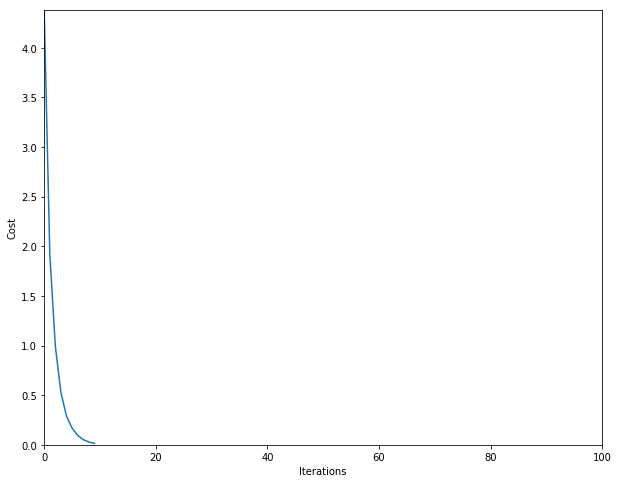

In [28]:
fig = plt.figure(figsize=(10,8))
plt.plot(cost)
plt.ylabel("Cost")
plt.xlabel("Iterations")
plt.axis([0,epochs,0,np.max(cost)])
plt.show()

In [29]:
cost

array([4.38087511, 1.92647636, 0.99035513, 0.52577472, 0.2882764 ,
       0.16766347, 0.09498059, 0.0525101 , 0.02776921, 0.01503795])